# Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


# Steps
# <a href = "#1"> 1- Read Data <a>
# <a href = "#2"> 2- Data Exploring and Investigation <a>
# <a href = "#3"> 3- Feature Selection <a>
# <a href = "#4"> 4- Cleaning Training Data <a>  
# <a href = "#5"> 5- Cleaning Test Data <a>
# <a href = "#6"> 6- Ecode Training and Test Data <a>  
# <a href = "#7"> 7- Split Data <a>
# <a href = "#8"> 8- Apply Models <a>
# <a href = "#9"> 9- Linear Regression <a>
# <a href = "#10"> 10- Random Forest <a>
# <a href = "#11"> 11- GradientBoosting <a>
# <a href = "#12"> 12- Select Prameters <a>

# <a name = "1">1- Read Data<a>

## Note: I keep the label in data_with_label to investigate my data.

In [2]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv' , index_col= 'Id')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

Test_data_Id = test_data["Id"]

data_with_label = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv' , index_col= 'Id')
data_with_label.dropna(axis=0, subset=['SalePrice'], inplace=True)

# <a name = "2">2- Data Exploring and Investigation<a>

### Just checking my data

In [3]:
data_with_label.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check nulls and proper data types

In [4]:
data_with_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Check most correlated features with the target

In [5]:
top_corr_features = data_with_label.corr()['SalePrice'].sort_values(ascending=False)
top_corr_features

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Check the skewness in the data

In [6]:
data_with_label.skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

### Check the histogram to get how data skewed and nulls Visually will be butter.

array([<AxesSubplot:title={'center':'MSSubClass'}>,
       <AxesSubplot:title={'center':'LotFrontage'}>,
       <AxesSubplot:title={'center':'LotArea'}>,
       <AxesSubplot:title={'center':'OverallQual'}>,
       <AxesSubplot:title={'center':'OverallCond'}>,
       <AxesSubplot:title={'center':'YearBuilt'}>], dtype=object)

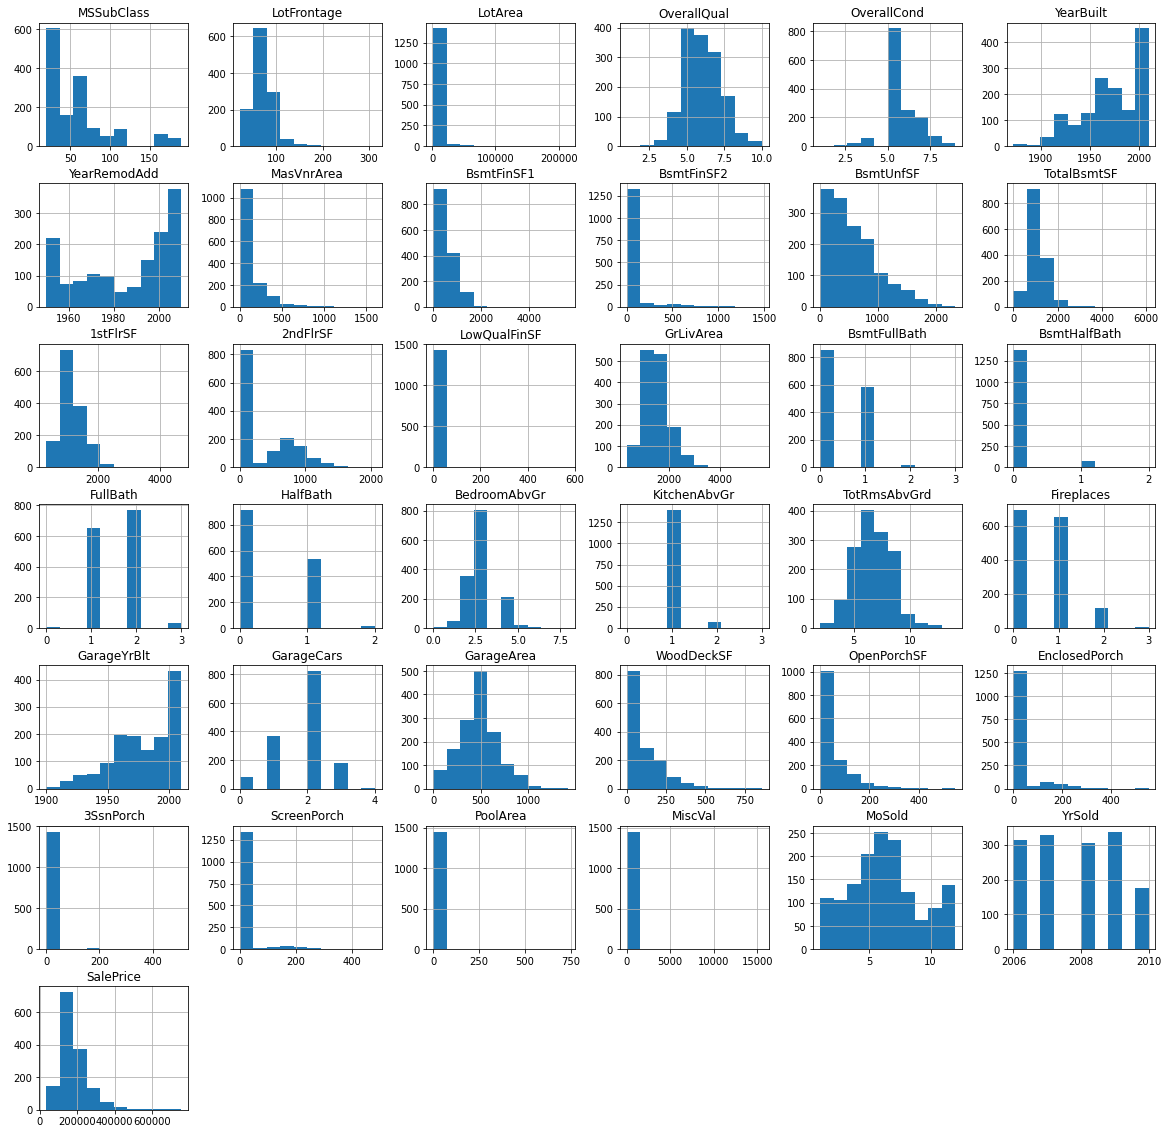

In [7]:
data_with_label.hist(figsize = (20 ,20))[0]

### Check the correlation between each feature and the others

In [8]:
Correlation_Matrix = train_data.select_dtypes(np.number).corr()
fig = px.imshow(Correlation_Matrix, text_auto=True  , color_continuous_scale=px.colors.sequential.Viridis)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()

# <a name = "3"> 3- Feature Selection <a>

## Decide Which features Important depend on the exploration above.

In [9]:
categorical_feature = ["Utilities" ,"Neighborhood",  "Condition1" , "Condition2","BldgType" ,
               "HouseStyle"  , "Exterior1st",
               "Exterior2nd", "SaleType","SaleCondition"]

ordinal_feature = ["BsmtQual" ,"Foundation" ,"BsmtExposure"  ,"BsmtFinType1" ,"BsmtFinType2", "HeatingQC" ,
                  "CentralAir" ,"Electrical" ,"KitchenQual"]


numerical_feature = ["LotFrontage" , "LotArea" ,"BsmtFinSF1" ,"1stFlrSF" , "2ndFlrSF" , "FullBath",
                     "TotRmsAbvGrd"  ,"3SsnPorch","ScreenPorch", "PoolArea", "OverallQual","OverallCond" ,"YearRemodAdd"
                    ,"BsmtFinSF2","TotalBsmtSF" ,"GarageCars"]

training_features = categorical_feature+ordinal_feature+numerical_feature+["SalePrice"]
test_features = categorical_feature+ordinal_feature+numerical_feature

# <a name = "4"> 4- Cleaning Training Data <a> 

In [10]:
train_data = train_data[training_features].copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Utilities      1460 non-null   object 
 1   Neighborhood   1460 non-null   object 
 2   Condition1     1460 non-null   object 
 3   Condition2     1460 non-null   object 
 4   BldgType       1460 non-null   object 
 5   HouseStyle     1460 non-null   object 
 6   Exterior1st    1460 non-null   object 
 7   Exterior2nd    1460 non-null   object 
 8   SaleType       1460 non-null   object 
 9   SaleCondition  1460 non-null   object 
 10  BsmtQual       1423 non-null   object 
 11  Foundation     1460 non-null   object 
 12  BsmtExposure   1422 non-null   object 
 13  BsmtFinType1   1423 non-null   object 
 14  BsmtFinType2   1422 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  Electrical     1459 non-null   object 
 18  KitchenQ

## Fill missing values with mean if numeric and mode if catigorical

In [11]:
train_filling_null = { "BsmtQual" : train_data["BsmtQual"].mode().iloc[0]  ,
                "BsmtExposure" : train_data["BsmtExposure"].mode().iloc[0],
                "BsmtFinType1" : train_data["BsmtFinType1"].mode().iloc[0],
                "BsmtFinType2" : train_data["BsmtFinType2"].mode().iloc[0],    
               "LotFrontage" : train_data["LotFrontage"].mean()   }

train_data = (train_data.fillna(value = train_filling_null)).copy()
train_data = train_data.dropna(axis = 0)
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Utilities      1459 non-null   object 
 1   Neighborhood   1459 non-null   object 
 2   Condition1     1459 non-null   object 
 3   Condition2     1459 non-null   object 
 4   BldgType       1459 non-null   object 
 5   HouseStyle     1459 non-null   object 
 6   Exterior1st    1459 non-null   object 
 7   Exterior2nd    1459 non-null   object 
 8   SaleType       1459 non-null   object 
 9   SaleCondition  1459 non-null   object 
 10  BsmtQual       1459 non-null   object 
 11  Foundation     1459 non-null   object 
 12  BsmtExposure   1459 non-null   object 
 13  BsmtFinType1   1459 non-null   object 
 14  BsmtFinType2   1459 non-null   object 
 15  HeatingQC      1459 non-null   object 
 16  CentralAir     1459 non-null   object 
 17  Electrical     1459 non-null   object 
 18  KitchenQ

# <a name = "5"> 4- Cleaning Test Data <a> 

In [12]:
test_data = test_data[test_features]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Utilities      1457 non-null   object 
 1   Neighborhood   1459 non-null   object 
 2   Condition1     1459 non-null   object 
 3   Condition2     1459 non-null   object 
 4   BldgType       1459 non-null   object 
 5   HouseStyle     1459 non-null   object 
 6   Exterior1st    1458 non-null   object 
 7   Exterior2nd    1458 non-null   object 
 8   SaleType       1458 non-null   object 
 9   SaleCondition  1459 non-null   object 
 10  BsmtQual       1415 non-null   object 
 11  Foundation     1459 non-null   object 
 12  BsmtExposure   1415 non-null   object 
 13  BsmtFinType1   1417 non-null   object 
 14  BsmtFinType2   1417 non-null   object 
 15  HeatingQC      1459 non-null   object 
 16  CentralAir     1459 non-null   object 
 17  Electrical     1459 non-null   object 
 18  KitchenQ

In [13]:
test_filling_null = { "BsmtQual" : test_data["BsmtQual"].mode().iloc[0]  ,
                     "BsmtExposure" : test_data["BsmtExposure"].mode().iloc[0],
                     "BsmtFinType1" : test_data["BsmtFinType1"].mode().iloc[0],
                     "BsmtFinType2" : test_data["BsmtFinType2"].mode().iloc[0],    
                     "LotFrontage" : test_data["LotFrontage"].mean(),
                     "Utilities" : test_data["Utilities"].mode().iloc[0],
                     "Exterior1st" : test_data["Exterior1st"].mode().iloc[0],
                     "SaleType" : test_data["SaleType"].mode().iloc[0],
                     "Exterior2nd" : test_data["Exterior2nd"].mode().iloc[0],
                     "KitchenQual" : test_data["KitchenQual"].mode().iloc[0],
                     "BsmtFinSF1" : test_data["BsmtFinSF1"].mean(),
                     "BsmtFinSF2" : test_data["BsmtFinSF2"].mean(),
                     "TotalBsmtSF" : test_data["TotalBsmtSF"].mean(),
                     "GarageCars" : test_data["GarageCars"].mean(),
                     
                     
                    }

test_data = test_data.fillna(value = test_filling_null)
# test_data = test_data.dropna(axis = 0)
test_data.head()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Utilities      1459 non-null   object 
 1   Neighborhood   1459 non-null   object 
 2   Condition1     1459 non-null   object 
 3   Condition2     1459 non-null   object 
 4   BldgType       1459 non-null   object 
 5   HouseStyle     1459 non-null   object 
 6   Exterior1st    1459 non-null   object 
 7   Exterior2nd    1459 non-null   object 
 8   SaleType       1459 non-null   object 
 9   SaleCondition  1459 non-null   object 
 10  BsmtQual       1459 non-null   object 
 11  Foundation     1459 non-null   object 
 12  BsmtExposure   1459 non-null   object 
 13  BsmtFinType1   1459 non-null   object 
 14  BsmtFinType2   1459 non-null   object 
 15  HeatingQC      1459 non-null   object 
 16  CentralAir     1459 non-null   object 
 17  Electrical     1459 non-null   object 
 18  KitchenQ

# <a name = "6"> 6- Ecode Training and Test Data <a>  

# One Hot Encoding with Training Data 

In [14]:
Onehot_Encoding = OneHotEncoder(sparse=False)
features_Onehot_encoded = pd.DataFrame(Onehot_Encoding.fit_transform(train_data[categorical_feature] ))
features_Onehot_encoded.columns = Onehot_Encoding.get_feature_names(categorical_feature)
# train_features = pd.concat([train_features , pd.DataFrame(features)],axis=1)
train_data[features_Onehot_encoded.columns] = features_Onehot_encoded
train_data = train_data.drop(train_data[categorical_feature] ,axis =1)
train_data = train_data.dropna()
train_data.head()

,BsmtQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,LotFrontage,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,Gd,PConc,No,GLQ,Unf,Ex,Y,SBrkr,Gd,65.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Gd,CBlock,Gd,ALQ,Unf,Ex,Y,SBrkr,TA,80.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Gd,PConc,Mn,GLQ,Unf,Ex,Y,SBrkr,Gd,68.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,TA,BrkTil,No,ALQ,Unf,Gd,Y,SBrkr,Gd,60.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Gd,PConc,Av,GLQ,Unf,Ex,Y,SBrkr,Gd,84.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Ordinal Encoding with Training Data 

In [15]:

ordinal_encoder = OrdinalEncoder()
ord_encoded_feature = pd.DataFrame(ordinal_encoder.fit_transform(train_data[ordinal_feature] ))

train_data[ord_encoded_feature.columns] = ord_encoded_feature
train_data = train_data.drop(train_data[ordinal_feature] ,axis =1)
# train_features = train_features.dropna()
train_data.head()

,LotFrontage,LotArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,3SsnPorch,ScreenPorch,PoolArea,...,SaleCondition_Partial,0,1,2,3,4,5,6,7,8
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,706,856,854,2,8,0,0,0,...,0.0,2.0,1.0,1.0,0.0,5.0,0.0,1.0,4.0,3.0
2,80.0,9600,978,1262,0,2,6,0,0,0,...,0.0,2.0,2.0,2.0,2.0,5.0,0.0,1.0,4.0,2.0
3,68.0,11250,486,920,866,2,6,0,0,0,...,0.0,3.0,0.0,3.0,0.0,5.0,2.0,1.0,4.0,2.0
4,60.0,9550,216,961,756,1,7,0,0,0,...,0.0,2.0,2.0,0.0,2.0,5.0,0.0,1.0,4.0,2.0
5,84.0,14260,655,1145,1053,2,9,0,0,0,...,0.0,2.0,5.0,3.0,2.0,5.0,0.0,1.0,4.0,3.0


## Check data after encoding

In [16]:
train_data.shape

(1457, 129)

# One Hot Encoding test Data

In [17]:
t = pd.DataFrame(Onehot_Encoding.transform(test_data[categorical_feature] ))
t.columns = Onehot_Encoding.get_feature_names(categorical_feature)
test_data[t.columns] = t
test_data = test_data.drop(test_data[categorical_feature] ,axis =1)


In [18]:
ord_feature = pd.DataFrame(ordinal_encoder.fit_transform(test_data[ordinal_feature]))

test_data[ord_feature.columns] = ord_feature
test_data = test_data.drop(test_data[ordinal_feature] ,axis =1)
# test_data = test_data.dropna()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 128 entries, LotFrontage to 8
dtypes: float64(117), int64(11)
memory usage: 1.4 MB


In [19]:
test_data.shape

(1459, 128)

# Split SalePrice As label

In [20]:
train_labels = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

# <a name = "7"> 7- Split Data <a>

## Split to train and validation to select the suitabel parameters

In [21]:
def split_data(train_features , train_labels):
    validation_set = train_features.iloc[1100:]
    validation_labels = train_labels.iloc[1100:]

    train_features = train_features.iloc[0:1100]
    train_labels = train_labels.iloc[0:1100]
    return validation_set , validation_labels , train_features , train_labels
    # validation_set.shape

## Fix train and test NaNs after the encoding

In [22]:
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

# 8- Apply Models<a name = "8">.<a>

# <a name = "9"> 9- Linear Regression <a>

In [23]:

reg = LinearRegression().fit(train_data, train_labels)
reg.score(train_data, train_labels)


0.7991593649641737

In [24]:
LR_predection = reg.predict(test_data)
LiearReg_predection = pd.DataFrame()
LiearReg_predection['Id'] = Test_data_Id
LiearReg_predection['SalePrice'] = LR_predection[0:1459]
LiearReg_predection.shape

(1459, 2)

# <a name = "10"> 10- Random Forest <a>

In [25]:

reg = RandomForestRegressor(max_depth=19, random_state=0)
reg.fit(train_data, train_labels)
reg.score(train_data, train_labels)

0.9788420545664865

In [26]:
RF_predection = reg.predict(test_data)
RandomForest_predection = pd.DataFrame()
RandomForest_predection['Id'] = Test_data_Id
RandomForest_predection['SalePrice'] = RF_predection[0:1459]
RandomForest_predection.shape

(1459, 2)

# <a name = "11"> 11- GradientBoosting <a>

In [27]:
reg = GradientBoostingRegressor(n_estimators=13, learning_rate= 0.0004,
max_depth=2, random_state=0).fit(train_data, train_labels)
reg.score(train_data, train_labels)

0.006556585511733104

In [28]:
GB_predection = reg.predict(test_data)
GradientBoost_predection = pd.DataFrame()
GradientBoost_predection['Id'] = Test_data_Id
GradientBoost_predection['SalePrice'] = GB_predection[0:1459]
GradientBoost_predection.shape

(1459, 2)

# <a name = "12"> 12- Select Prameters <a>

# Graph of scores vs 10 Parameters of Max_depth

<function matplotlib.pyplot.show(close=None, block=None)>

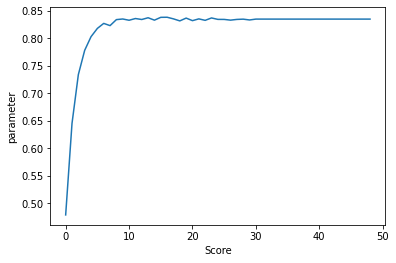

In [29]:
validation_set ,validation_labels , train_set , label_train_set =  split_data(train_data , train_labels)
listof_scores = []
list_of_paramters = [2 , 10 , 5 , 3 , 15 , 30 , 9 , 4 , 12 , 35]
for i in range(1,50):
    regrr = RandomForestRegressor(max_depth=i, random_state=0)
    regrr.fit(train_set, label_train_set)
    listof_scores.append(regrr.score(validation_set, validation_labels))
    
plt.plot(listof_scores)    
plt.xlabel("Score")
plt.ylabel("parameter")
plt.show

In [30]:
print(listof_scores)
print(listof_scores.index(max(listof_scores)))

[0.47865998429226886, 0.6449697094765141, 0.7337235613958959, 0.7778662042778343, 0.8026517585646906, 0.8176839986063091, 0.8268014036817852, 0.8227670250970073, 0.8336685171702742, 0.8348114654173293, 0.8325163408158605, 0.8356500577655225, 0.8338854942594308, 0.8370668386264368, 0.832692148198204, 0.8378229730705508, 0.8379858546618093, 0.8350301614174271, 0.8313565291699971, 0.8364442402604676, 0.8318051602416976, 0.8350139586775714, 0.8323598590122269, 0.836704561801697, 0.834099182559785, 0.8340337150104924, 0.8327144757420639, 0.8340283170794183, 0.8345058670125348, 0.8330352748233153, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402, 0.8346086773578402]
16


# Graph of scores vs 10 alphas

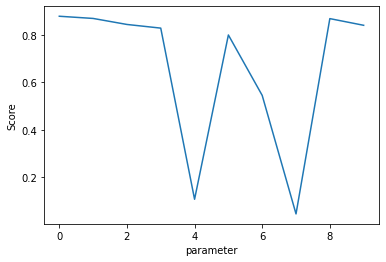

In [31]:
validation_set ,validation_labels , train_set , label_train_set =  split_data(train_data , train_labels)
listof_scores = []
list_of_alpha = [0.1 , 0.5 , 0.8 , 0.55 , 0.001 , 1.0 , 0.009 , 0.0004 , 0.2 , 0.6]
for i in list_of_alpha:
    regrr = GradientBoostingRegressor(n_estimators=100, learning_rate=i,
            max_depth=2, random_state=0).fit(train_set, label_train_set)
    listof_scores.append(regrr.score(validation_set, validation_labels))
    
plt.plot(listof_scores)    
plt.xlabel("parameter")
plt.ylabel("Score")
plt.show

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Save Predictions

In [32]:
RandomForest_predection.to_csv("predections.csv", index=None, sep=",")